Feature Importance

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [30]:
data = pd.read_excel('/content/dataset-uci 2.xls')

In [31]:
data = data.drop(23)
data = data.drop('Obesity (%)', axis=1)

In [33]:
y = data['Gallstone Status']
X = data.drop(columns=['Gallstone Status'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

In [35]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    random_state=1,
    n_jobs=2
)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [37]:
#feature importance
importances = forest.feature_importances_
feat_labels = X.columns
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) C-Reactive Protein (CRP)       0.142910
 2) Vitamin D                      0.106953
 3) Extracellular Fluid/Total Body Water (ECF/TBW) 0.042889
 4) Extracellular Water (ECW)      0.042493
 5) Lean Mass (LM) (%)             0.033501
 6) Body Protein Content (Protein) (%) 0.031432
 7) Hemoglobin (HGB)               0.030411
 8) Total Body Fat Ratio (TBFR) (%) 0.030220
 9) Total Fat Content (TFC)        0.030045
10) Intracellular Water (ICW)      0.030021
11) Visceral Muscle Area (VMA) (Kg) 0.029259
12) Glucose                        0.028960
13) Bone Mass (BM)                 0.028231
14) Glomerular Filtration Rate (GFR) 0.027316
15) High Density Lipoprotein (HDL) 0.026296
16) Visceral Fat Area (VFA)        0.026006
17) Alkaline Phosphatase (ALP)     0.024502
18) Body Mass Index (BMI)          0.024374
19) Height                         0.023134
20) Aspartat Aminotransferaz (AST) 0.022786
21) Total Cholesterol (TC)         0.021718
22) Triglyceride                   0.021615
23) Crea

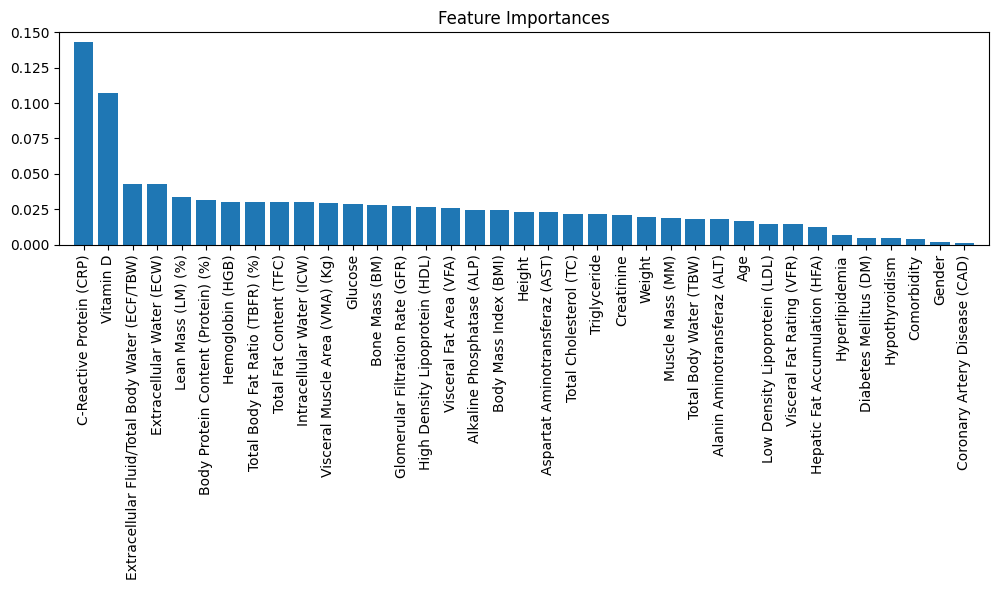

In [38]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]),
 feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [39]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수:", X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [40]:
for f in range(X_selected.shape[1]):
  print('%2d) %-*s %f' % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) C-Reactive Protein (CRP)       0.142910
 2) Vitamin D                      0.106953


              precision    recall  f1-score   support

           0       0.74      0.83      0.78       112
           1       0.80      0.70      0.75       110

    accuracy                           0.77       222
   macro avg       0.77      0.77      0.76       222
weighted avg       0.77      0.77      0.76       222

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        48
           1       0.73      0.67      0.70        48

    accuracy                           0.71        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.71      0.71      0.71        96



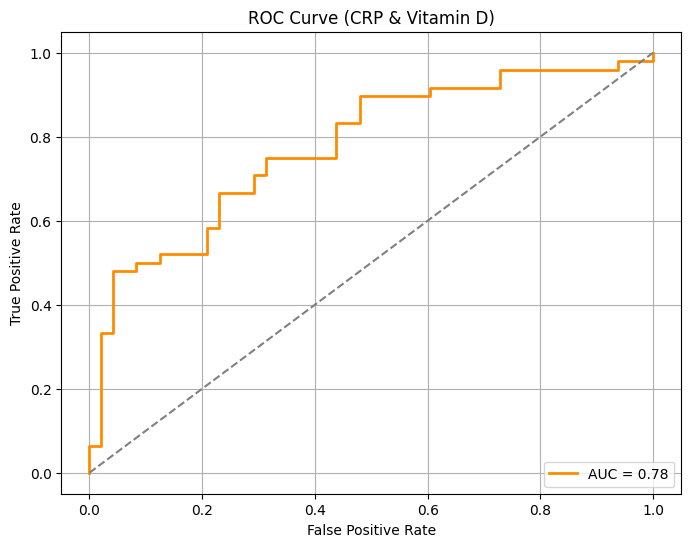

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        48
           1       0.73      0.67      0.70        48

    accuracy                           0.71        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.71      0.71      0.71        96



In [41]:
#feature importance용 코드
selected_features = ['C-Reactive Protein (CRP)', 'Vitamin D']
X_selected = data[selected_features].values
y = data.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)
print(classification_report(y_train, y_train_pred))

y_test_pred = lr.predict(X_test_std)
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

y_proba = lr.predict_proba(X_test_std)[:, 1]  # 클래스 1 (양성) 확률
y_pred = lr.predict(X_test_std)


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# 7. 그래프 출력
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CRP & Vitamin D)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 8. 성능 출력
print(classification_report(y_test, y_pred))

상관계수

In [49]:
data = pd.read_excel('/content/dataset-uci 2.xls')

In [50]:
data = data.drop(23)
data = data.drop('Obesity (%)', axis=1)

In [55]:
import pandas as pd
import numpy as np

target_col = 'Gallstone Status'

features = data.drop(columns=[target_col])

corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.7)]

selected_features = [col for col in data.columns if col not in to_drop and col != target_col]

print("선택된 유용한 피처 리스트 (상관계수 0.7 이상 제거 후):")
print(selected_features)

선택된 유용한 피처 리스트 (상관계수 0.7 이상 제거 후):
['Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Weight', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Body Protein Content (Protein) (%)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


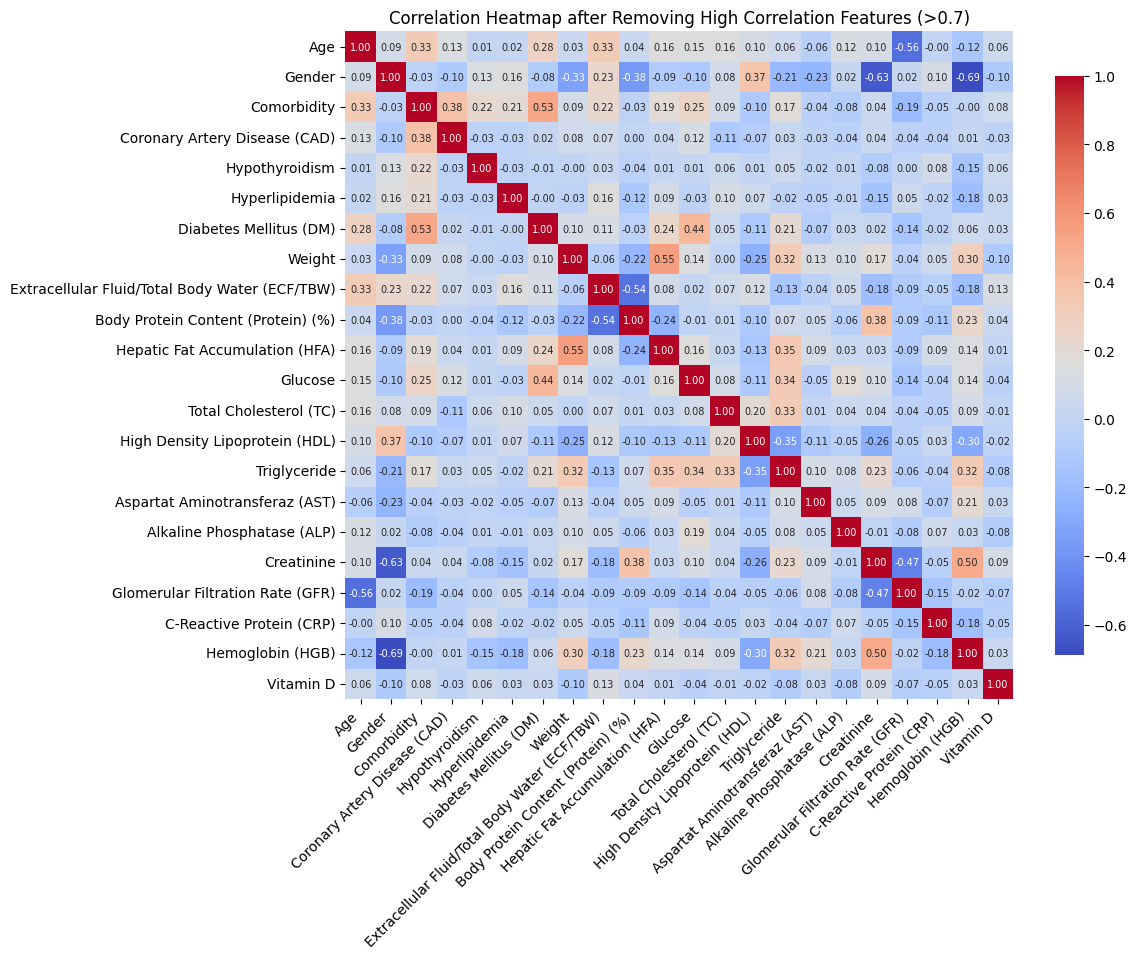

In [56]:
# 절댓값 상관행렬 계산
corr_matrix = features.corr().abs()

# 상삼각행렬 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.7 이상 상관관계 컬럼 찾기
to_drop = [col for col in upper.columns if any(upper[col] > 0.7)]

# 컬럼 제거
features_reduced = features.drop(columns=to_drop)

# 제거 후 상관행렬 다시 계산
reduced_corr = features_reduced.corr()

# 히트맵 그리기
plt.figure(figsize=(12,10))
sns.heatmap(
    reduced_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 7}
)

plt.xticks(rotation=45, ha='right')  # x축 라벨 45도 기울이기, 오른쪽 정렬
plt.yticks(rotation=0)                # y축 라벨은 세로로 놔두기

plt.title('Correlation Heatmap after Removing High Correlation Features (>0.7)')
plt.tight_layout()
plt.show()